DATA PRE-PROCESSING : Checking for missing values
ColumnName, DataType, MissingValues
name , object , False
gender , object , False
origin , object , False
hair , int64 , False
feathers , int64 , False
eggs , int64 , False
milk , int64 , False
airborne , int64 , False
aquatic , int64 , False
predator , int64 , False
toothed , int64 , False
backbone , int64 , False
breathes , int64 , False
venomous , int64 , False
fins , int64 , False
legs , int64 , False
tail , int64 , False
domestic , int64 , False
catsize , int64 , False
type , int64 , False
DATA PRE-PROCESSING : Dropping ID column
DATA PRE-PROCESSING : Converting Categorical to Numerical


'Data Example:'

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,gender_Female,gender_Male,origin_Africa,origin_Asia,origin_Europe,origin_North America,origin_Oceania,origin_South America
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,0,0,0,0,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,0,0,0,0,1,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1,0,1,0,0,0,0,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,0,1,0,0,0,0,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,0,1,0,0,0,0,0,1


Using N-fold cross evaluations
------- ************* SVM for Full model ************* -------
 Model 1 : Using all features given in data set
Accuracy using Linear kernel Function: 0.9593149540517961
Accuracy using Radial Basis Kernel Function: 0.9593149540517961


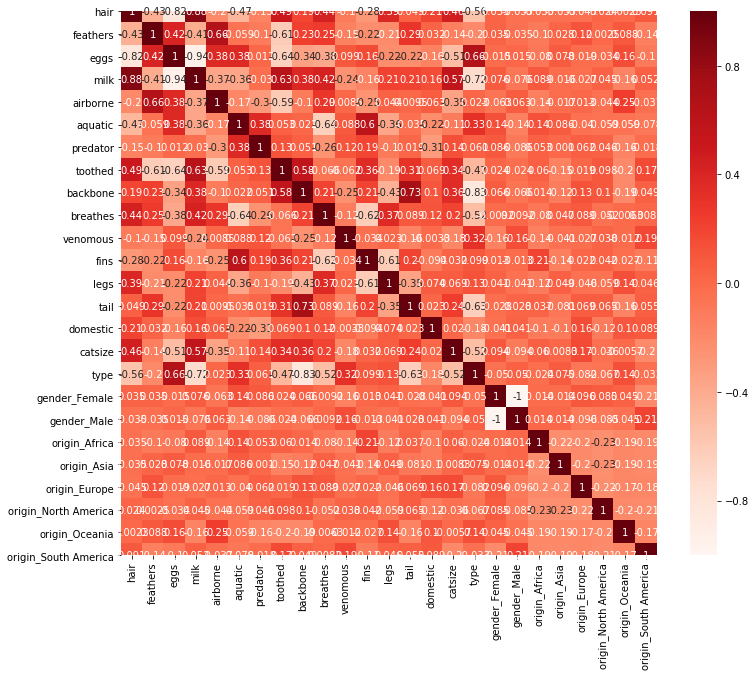

------- ************* SVM Using Feature Selection by Filter model ************* -------
Features selected  hair        0.562384
eggs        0.661825
milk        0.723683
backbone    0.828845
breathes    0.519308
tail        0.631830
catsize     0.521030
type        1.000000
Name: type, dtype: float64

 Model 2 : Using all features from feature selection (Filter Method)
Selected Features :  ['hair', 'eggs', 'milk', 'backbone', 'breathes', 'tail', 'catsize']
Accuracy using Linear kernel Function: 0.8913571808308649
Accuracy using Radial Basis Kernel Function: 0.8913571808308649

 Model 3 : Using top 3 features from feature selection (Filter Method)
Selected Features :  ['hair', 'eggs', 'milk']
Accuracy using Linear kernel Function: 0.6355585934533303
Accuracy using Radial Basis Kernel Function: 0.6355585934533303

 Model 4 : Using top 5 features from feature selection (Filter Method)
Selected Features :  ['hair', 'eggs', 'milk', 'backbone', 'breathes']
Accuracy using Linear kernel Functi

In [2]:

# Support Vector Machine

import numpy as np
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import seaborn as sns

# Loading data from CSV file
zoo_data=pd.read_csv('W11_zoo.csv')

# Checking for missing values
cols=zoo_data.columns
print('DATA PRE-PROCESSING : Checking for missing values')
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', zoo_data[i].dtype,',',zoo_data[i].isnull().any())

print('DATA PRE-PROCESSING : Dropping ID column')
zoo_data=zoo_data.drop('name',1)

# Converting features to Numerical values
# preprocess label, since SVM requires label encoding

from sklearn import preprocessing
print('DATA PRE-PROCESSING : Converting Categorical to Numerical')
zoo_data_svm=zoo_data.copy(deep=True) 
zoo_data_dummies=pd.get_dummies(zoo_data_svm[['gender','origin']])
zoo_data_svm=zoo_data_svm.join(zoo_data_dummies)
zoo_data_svm=zoo_data_svm.drop('gender',1)
zoo_data_svm=zoo_data_svm.drop('origin',1)
display('Data Example:',HTML(zoo_data_svm.head(10).to_html()))
    
    
# installing required packages for SVM
from sklearn.svm import SVC

y=zoo_data_svm['type']
print("Using N-fold cross evaluations")
from sklearn.model_selection import cross_val_score
import warnings

warnings.simplefilter("ignore")

# SVM - Full Model 


print('------- ************* SVM for Full model ************* -------')
print(' Model 1 : Using all features given in data set')  
x1=zoo_data_svm.drop('type',axis=1)

clf1=SVC(kernel='linear', C=1E10)
Model1_Lin=cross_val_score(clf1, x1, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model1_Lin)
clf2=SVC(kernel='rbf', C=1E10)
Model1_RBF=cross_val_score(clf2, x1, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model1_RBF)

# Feature selection by using Filter model ###########

# by using Pearson correlation as selecting criterion
# Pearson correlation can only be applied among numerical variables
# in this data, GradeLetter is highly correlated with numerical variable Grade

# calculate correlation and show in heatmap
plt.figure(figsize=(12,10))
cor = zoo_data_svm.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()




# FEATURE SELECTION USING FILTER METHOD


print('------- ************* SVM Using Feature Selection by Filter model ************* -------')

#Correlation with output variable
cor_target = abs(cor["type"])
#Selecting highly correlated features
selected_features_BE = cor_target[cor_target>0.5]
print("Features selected ", selected_features_BE)

# SVM -  Model2 with all features from FS


print('\n Model 2 : Using all features from feature selection (Filter Method)')   
selected_features_BE = ['hair','eggs','milk','backbone','breathes','tail','catsize']
print('Selected Features : ',selected_features_BE)

x2=zoo_data_svm.drop('type',axis=1)
x2 = pd.DataFrame(x2, columns = selected_features_BE)
warnings.simplefilter("ignore")

clf1=SVC(kernel='linear', C=1E10)
Model2_Lin=cross_val_score(clf1, x2, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model2_Lin)

clf2=SVC(kernel='rbf', C=1E10)
Model2_RBF=cross_val_score(clf2, x2, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model2_RBF)

# ------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------
# SVM -  Model3 with top 3 features from FS
#--------------------------------------------------------------------------------------------------
print('\n Model 3 : Using top 3 features from feature selection (Filter Method)')   
top = 3
top3_features_BE = []
x3=zoo_data_svm.drop('type',1)
for i in range(top):
    top3_features_BE.append(selected_features_BE[i])
    
x3 = pd.DataFrame(x3, columns = top3_features_BE)
print('Selected Features : ',top3_features_BE)
warnings.simplefilter("ignore")
  
clf1=SVC(kernel='linear', C=1E10)
Model3_Lin=cross_val_score(clf1, x3, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model3_Lin)

clf2=SVC(kernel='rbf', C=1E10)
Model3_RBF=cross_val_score(clf2, x3, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model3_RBF)


# SVM -  Model4 with top5 features from FS

print('\n Model 4 : Using top 5 features from feature selection (Filter Method)')   
top = 5
top5_features_BE = []
x4=zoo_data_svm.drop('type',1)
for i in range(top):
    top5_features_BE.append(selected_features_BE[i])
    
x4=zoo_data_svm.drop('type',1)
x4 = pd.DataFrame(x4, columns = top5_features_BE)
print('Selected Features : ',top5_features_BE)
warnings.simplefilter("ignore")

clf1=SVC(kernel='linear', C=1E10)
Model4_Lin=cross_val_score(clf1, x4, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model4_Lin)

clf2=SVC(kernel='rbf', C=1E10)
Model4_RBF=cross_val_score(clf2, x4, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model4_RBF)


# SVM -  Model5 with top4 features from FS

print('\n Model 5 : Using top 4 features from feature selection (Filter Method)')   
top = 4
top4_features_BE = []
x5=zoo_data_svm.drop('type',1)
for i in range(top):
    top4_features_BE.append(selected_features_BE[i])
    
x5=zoo_data_svm.drop('type',1)
x5 = pd.DataFrame(x5, columns = top4_features_BE)
print('Selected Features : ',top4_features_BE)
warnings.simplefilter("ignore")

clf1=SVC(kernel='linear', C=1E10)
Model5_Lin=cross_val_score(clf1, x5, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model5_Lin)

clf2=SVC(kernel='rbf', C=1E10)
Model5_RBF=cross_val_score(clf2, x5, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model5_RBF)

# SVM -  Model6 with top 6 features from FS

print('\n Model 6 : Using top 6 features from feature selection (Filter Method)')   
top = 6
top6_features_BE = []
x6=zoo_data_svm.drop('type',1)
for i in range(top):
    top6_features_BE.append(selected_features_BE[i])
    
x6=zoo_data_svm.drop('type',1)
x6 = pd.DataFrame(x6, columns = top6_features_BE)
print('Selected Features : ',top6_features_BE)
warnings.simplefilter("ignore")

clf1=SVC(kernel='linear', C=1E10)
Model6_Lin=cross_val_score(clf1, x6, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Linear kernel Function:",Model6_Lin)

clf2=SVC(kernel='rbf', C=1E10)
Model6_RBF=cross_val_score(clf2, x6, y, cv=5, scoring='accuracy').mean()
print("Accuracy using Radial Basis Kernel Function:",Model6_RBF)

# SVM -  Comparing Models

print("------------------------------------------- Support Vector Machine -------------------------------")
print("--------------------------------------------------------------------------------------------------")
print("Using N-fold Cross Validation Comparing Accuracy for Various models")
print('Model \t\t', 'Linear Kernel\t\t','\tRBF Kernel')
print('1 \t\t',Model1_Lin,'\t\t',Model1_RBF)
print('2 \t\t',Model2_Lin,'\t\t',Model2_RBF)
print('3 \t\t',Model3_Lin,'\t\t',Model3_RBF)
print('4 \t\t',Model4_Lin,'\t\t',Model4_RBF)
print('5 \t\t',Model5_Lin,'\t\t',Model5_RBF)
print('6 \t\t',Model6_Lin,'\t\t',Model6_RBF)
print("--------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------")

